# Continuous distribution of entanglement in _finite_ networks with a regular topology

This notebook contains the code to create the figures for _finite_ quantum networks (i.e., with boundaries) as shown in _Continuously Distributing Entanglement in Quantum Networks with Regular Topologies_ (2024). In particular, it contains

1. Performance metrics in finite chains and square-lattice networks
2. The same performance metrics for equivalent nodes

The first section presents the performance metrics (the virtual neighborhood size $v_i$ and virtual node degree $k_i$) as a function of the swap probability $q$. In this section, The procedure for producing each figure is as follows: (_i_) load data, (_ii_) verify the existence of a steady state of the performance metrics, and (_iii_) produce the figure.

For each seperate network parameter and topology, we load the data from the `data_<topology>_<parameter>.npy` file from the`\data` folder. The data can be (re)generated using the `data_gen_<topology>_<parameter>.py` scripts from `/data_generation`. These data generation scripts internally call the `data_gen_<topology>_<parameter>_run_sim.py` scripts that run $N$ network simulations using the `skeleton_<topology>.py` from `/simulation` and do the post-processing of the network samples for each combination of a specific value of $q$ and a specific value of a network parameter. 

The data contains (_a_) the sample means of the performance metrics at the final time step ($\bar{v}_{i, N}(t_{M-1})$ and $\bar{k}_{i, N}(t_{M-1})$), (_b_) the sample standard error of the mean performance metrics at the final time step ($\sigma_{\bar{v}_{i, N}(t_{M-1})}/\sqrt{N}$ and $\sigma_{\bar{v}_{i, N}(t_{M-1})}/\sqrt{N}$, where $\sigma_{\bar{v}_{i, N}(t_{M-1})}$ and $\sigma_{\bar{k}_{i, N}(t_{M-1})}$ are the sample standard deviations), (_c_) the error ($\varepsilon=(b-a)/\sqrt{N}$) for both the virtual neighborhood size and the virtual node degree, and (_d_) the maximum absolute difference between two averaged-performance metrics at different times during the steady-state window ($|\bar{X}_N(t_i)-\bar{X}_N(t_j)|\, \forall i,j \in W$, $i\neq j$). For details on these parameters, see Appendix B of _Continuously Distributing Entanglement in Quantum Networks with Regular Topologies_ (2024). 

Subsequently, In step (_ii_), we use Algorithm 2 from the Appendix B of _Continuously Distributing Entanglement in Quantum Networks with Regular Topologies_ (2024) with $\varepsilon'=3\varepsilon$ and the maximum difference between two averaged-performance metrics at different times during the steady-state window to determine if the performance metrics have attained their steady state values (abort if $\Delta_{ij}=2\varepsilon'-|\bar{X}_N(t_i)-\bar{X}_N(t_j)|<3\varepsilon'/2$, or, equivalently, $\varepsilon'/2=3\varepsilon/2<|\bar{X}_N(t_i)-\bar{X}_N(t_j)|$, $\forall i,j \in W$, $i\neq j$). If so, the performance metrics data is qualified to be used, and we generate the figures. Note that, in finite networks, boundary nodes have a lower bound $b$ on the virtual neigbhorhood size and virtual node degree. However, the simulation file stores the error using bounds for infinite networks, hence the error should be scaled according to the bounds of interior nodes accordingly to check for the steady state. For simplicity, to check if the performance metrics have converged to a steady state, we use the error scaled for the edge nodes in a finite chain and the corner note in a finite square grid -- the error will be smallest for these nodes, so if all nodes converge for this error value, the performance metrics have attained their steady state. In a chain, the bound on the performance metrics of edge nodes is half that of nodes in an infinite chain. In a square grid, the bound on the virtual node degree of corner nodes is half that of nodes in an infinite square grid; the situation is slightly more complex for the virtual node degree, but when the maximum swap distance $M=3$ and the cutoff time $t_{\mathrm{cut}}=11$, we can find that a corner node can have at most 9 virtual neigbhors, while a node in an infinite square grid can have $2M(M+1)=2\cdot 3\cdot 4=24$ virtual neigbhors, so the error factor should be scaled by $9/24$. We generate figures in a standard style using the `figure.MPLSTYLE` file.

The last section focuses more on the implementation of retrieving the performance metrics. In particular, we show that nodes with the same distance to the edge of the chain have (almost) the same performance metrics (additional information to the manuscript).  

## 1. Performance metrics in finite chains and square-lattice networks

In [1]:
import numpy as np
prob_swap_sweep_size = 101
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
max_swap_dist_range = [3, 1, 0]
time_cutoff = 11

time_cutoff_range = [22, 11, 2]
max_swap_dist = 2
number_of_samples = 10000

number_of_nodes = 2*(max_swap_dist+1)+1

In [2]:
# Import, reshape and rename data
data_fin_chain = np.load('data/data_fin_chain.npy')
data_fin_sq = np.load('data/data_fin_sq.npy')

data_fin_chain = np.reshape(data_fin_chain, (8, prob_swap_sweep_size, number_of_nodes))
data_fin_sq = np.reshape(data_fin_sq, (8, prob_swap_sweep_size, number_of_nodes, number_of_nodes))

#  Chain
###################################################################################
virt_nbhd_size_mean_fin_chain = data_fin_chain[0, :, :]
virt_nbhd_size_std_error_fin_chain = data_fin_chain[1, :, :]
virt_nbhd_size_error_fin_chain = data_fin_chain[2, :, :]
virt_nbhd_size_max_diff_fin_chain = data_fin_chain[3, :, :]

virt_node_deg_mean_fin_chain = data_fin_chain[4, :, :]
virt_node_deg_std_error_fin_chain = data_fin_chain[5, :, :]
virt_node_deg_error_fin_chain = data_fin_chain[6, :, :]
virt_node_deg_max_diff_fin_chain = data_fin_chain[7, :, :]

#  Square
###################################################################################
virt_nbhd_size_mean_fin_sq = data_fin_sq[0, :, :]
virt_nbhd_size_std_error_fin_sq = data_fin_sq[1, :, :]
virt_nbhd_size_error_fin_sq = data_fin_sq[2, :, :]
virt_nbhd_size_max_diff_fin_sq = data_fin_sq[3, :, :]

virt_node_deg_mean_fin_sq = data_fin_sq[4, :, :]
virt_node_deg_std_error_fin_sq = data_fin_sq[5, :, :]
virt_node_deg_error_fin_sq = data_fin_sq[6, :, :]
virt_node_deg_max_diff_fin_sq = data_fin_sq[7, :, :]

In [3]:
# Infinite network data for comparison
prob_swap_range = np.arange(1, prob_swap_sweep_size)/(prob_swap_sweep_size-1) # q = 0 (deterministic) not simulated for inf networks

data_inf_chain_time_cutoff = np.load('data/data_inf_chain_time_cutoff.npy')
data_inf_sq_time_cutoff = np.load('data/data_inf_sq_time_cutoff.npy')

data_inf_chain_time_cutoff = np.reshape(data_inf_chain_time_cutoff, (len(time_cutoff_range), len(prob_swap_range), 8))
data_inf_sq_time_cutoff = np.reshape(data_inf_sq_time_cutoff, (len(time_cutoff_range), len(prob_swap_range), 8))

virt_nbhd_size_mean_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 0]
virt_nbhd_size_std_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 1]
virt_nbhd_size_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 2]
virt_nbhd_size_max_diff_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 3]

virt_node_deg_mean_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 4]
virt_node_deg_std_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 5]
virt_node_deg_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 6]
virt_node_deg_max_diff_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 7]

virt_nbhd_size_mean_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 0]
virt_nbhd_size_std_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 1]
virt_nbhd_size_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 3]

virt_node_deg_mean_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 4]
virt_node_deg_std_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 5]
virt_node_deg_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 6]
virt_node_deg_max_diff_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 7]
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)

In [4]:
# Test whether the performance metrics have attained their steady states
error_factor = 3

#  Chain
##########################################################################################################################################
np.testing.assert_array_less(virt_nbhd_size_max_diff_fin_chain, error_factor*virt_nbhd_size_error_fin_chain/2)
np.testing.assert_array_less(virt_node_deg_max_diff_fin_chain, error_factor*virt_node_deg_error_fin_chain/2)


#  Maximum swap distance
##########################################################################################################################################
np.testing.assert_array_less(virt_nbhd_size_max_diff_fin_sq, error_factor*virt_nbhd_size_error_fin_sq*9/24)
np.testing.assert_array_less(virt_node_deg_max_diff_fin_sq, error_factor*virt_node_deg_error_fin_sq/2)

### Main text
#### The virtual neighborhood size in finite chain and square-lattice networks 

Text(1, 10, '(b)')

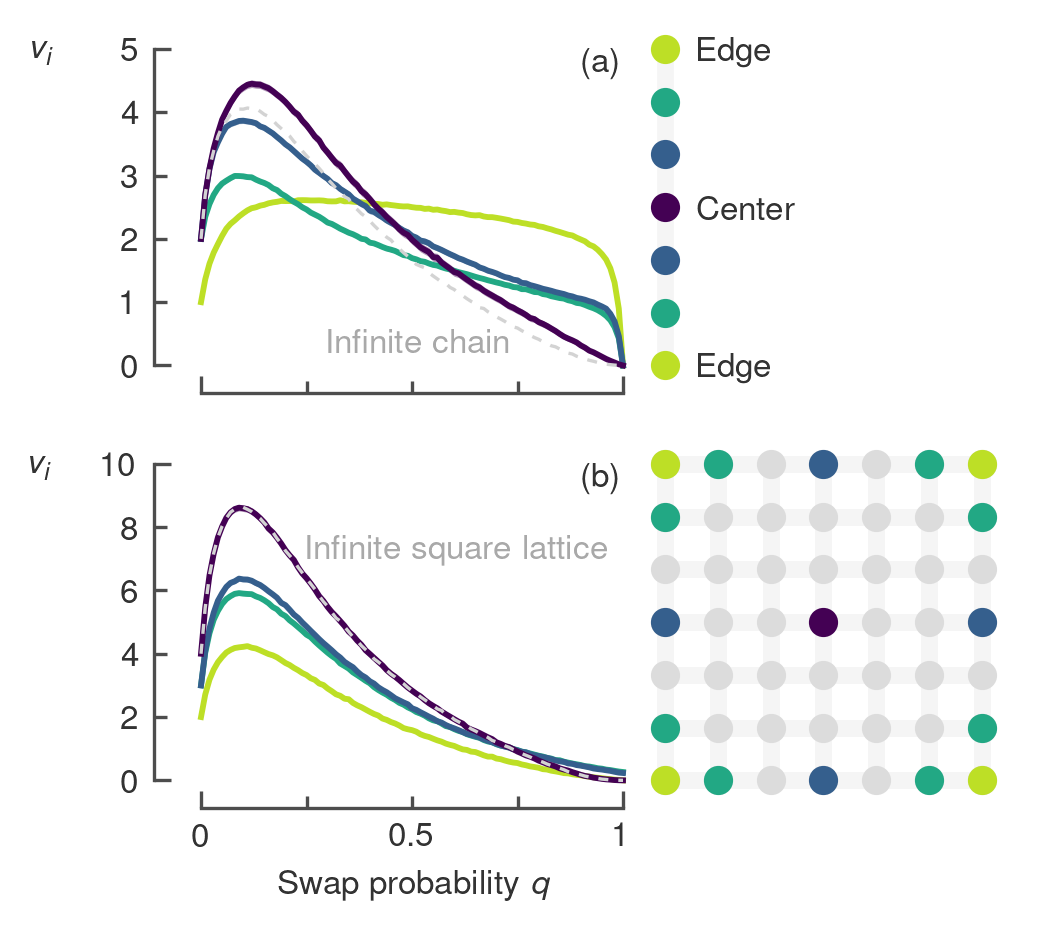

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  

col = plt.cm.viridis([0, 0.3, 0.6, 0.9])  # Plot line colors

v_max_chain = 5 
v_max_square = 10

fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=[(86)*mm, 86*mm/4*3.6], sharex='col') 

std_factor = 6
# Plotting data
for i in range(int(np.floor(number_of_nodes/2)), number_of_nodes-0):
    ax[0].plot(prob_swap_range, virt_nbhd_size_mean_fin_chain[:, i], color=col[i-int(np.floor(number_of_nodes/2))], zorder = -i)
    ax[0].fill_between(prob_swap_range, virt_nbhd_size_mean_fin_chain[:, i]-std_factor*virt_nbhd_size_std_error_fin_chain[:, i],  virt_nbhd_size_mean_fin_chain[:, i]+std_factor*virt_nbhd_size_std_error_fin_chain[:, i], color=col[i-int(np.floor(number_of_nodes/2))], linewidth = 0, alpha=0.4, zorder=i-100)

ax[0].plot(prob_swap_range, np.hstack(([2], virt_nbhd_size_mean_inf_chain_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 11, linewidth=0.8)

for i, j, k in [[3, 3, 0], [3, 0, 1], [1, 0, 2], [0, 0, 3]]:
    ax[1].plot(prob_swap_range, virt_nbhd_size_mean_fin_sq[:, i, j], color=col[k], zorder = -k)
    ax[1].fill_between(prob_swap_range, virt_nbhd_size_mean_fin_sq[:, i, j]-std_factor*virt_nbhd_size_std_error_fin_sq[:, i, j],  virt_nbhd_size_mean_fin_sq[:, i, j]+std_factor*virt_nbhd_size_std_error_fin_sq[:, i, j], color=col[k], linewidth = 0, alpha=0.4, zorder=i-5)

ax[1].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 11, linewidth=0.8)


# Set axes
ax[0].spines['left'].set_position(('outward', outward))
ax[0].spines['left'].set_bounds(0, v_max_chain)
ax[0].set_yticks(ticks=[0, v_max_chain])
ax[0].set_yticks(ticks=[1, 2, 3, 4], minor=True)
ax[0].set_yticklabels(labels=[1, 2, 3, 4], minor=True, ha='right')

ax[0].spines['bottom'].set_position(('outward', outward))
ax[0].spines['bottom'].set_bounds(0, 1)

ax[1].spines['left'].set_position(('outward', outward))
ax[1].spines['left'].set_bounds(0, v_max_square)
ax[1].set_yticks(ticks=[0, v_max_square])
ax[1].set_yticks(ticks=[2, 4, 6, 8], minor=True)
ax[1].set_yticklabels(labels=[2, 4, 6, 8], minor=True, ha='right')

ax[1].spines['bottom'].set_position(('outward', outward))
ax[1].spines['bottom'].set_bounds(0, 1)
ax[1].set_xticks(ticks=[0, 1], minor=False)
ax[1].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
ax[1].set_xticklabels(labels=[{}, 0.50, {}], minor=True)


# Axes labels
ax[1].set_xlabel(r'Swap probability $q$', x=0.45, color=color_text, ha='right')

ax[0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 16, ha='right')
ax[1].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')


# Legends
delta_x = 1/6
delta_y = 1/6

for i in range(7):
    ax[0].plot(1.1, i*delta_y*v_max_chain, '.', color=col[np.abs(i-3)], markersize=12)
    
ax[0].plot([1.1, 1.1], [0, v_max_chain], '-', linewidth=4, color='whitesmoke',zorder=-1)    
ax[0].text(1.175, 2.5, r'Center', color=color_text, fontsize=8, ha='left', va='center_baseline')
ax[0].text(1.175, 5, r'Edge', color=color_text, fontsize=8, ha='left', va='center_baseline')
ax[0].text(1.175, 0, r'Edge', color=color_text, fontsize=8, ha='left', va='center_baseline')



for i in range(7):
    for j in range(7):
        ax[1].plot(1.1+i*delta_x/ratio, j*v_max_square*delta_y, '.', color='gainsboro', markersize=12)
        ax[1].plot([1.1+i*delta_x/ratio, 1.1+i*delta_x/ratio], [0, v_max_square], '-', color='whitesmoke', linewidth=4,zorder=0)
        ax[1].plot([1.1, 1.1+1/ratio], [j*v_max_square*delta_y, j*v_max_square*delta_y], '-', color='whitesmoke', linewidth=4, zorder=0)

center_node = 3
boundary_node = 0
ax[1].plot(1.1+center_node*delta_x/ratio, center_node*v_max_square*delta_y, '.', color=col[0], markersize=12)
ax[1].plot([1.1+center_node*delta_x/ratio, 1.1+center_node*delta_x/ratio, 1.1, 1.1+1/ratio], [boundary_node*delta_y*v_max_square, v_max_square, center_node*delta_y*v_max_square, center_node*delta_y*v_max_square], '.', color=col[1], markersize=12)
ax[1].plot([1.1+delta_x/ratio, 1.1+5*delta_x/ratio, 1.1+6*delta_x/ratio, 1.1+6*delta_x/ratio, 1.1+5*delta_x/ratio, 1.1+1*delta_x/ratio, 1.1, 1.1], [0, 0, delta_y*v_max_square, 5*delta_y*v_max_square, 6*delta_y*v_max_square, 6*delta_y*v_max_square, 5*delta_y*v_max_square, 1*delta_y*v_max_square], '.', color=col[2], markersize=12)
ax[1].plot([1.1, 1.1+1/ratio, 1.1+1/ratio, 1.1], [0, 0, v_max_square, v_max_square], '.', color=col[3], markersize=12)


# Plot remarks
ax[0].text(0.3, 0.2, r'Infinite chain', color='darkgray', fontsize=8)
ax[1].text(0.25, 7, r'Infinite square lattice', color='darkgray', fontsize = 8)


# Setting plot limits and aspect ratio
ax[0].set_ylim([0-0.06*v_max_chain, v_max_chain+0.06*v_max_chain])
ax[0].set_aspect(1/(v_max_chain*ratio))

ax[1].set_ylim([0-0.06*v_max_square, v_max_square+0.06*v_max_square])
ax[1].set_aspect(1/(v_max_square*ratio))

# Labels
ax[0].text(1, v_max_chain, r'(a)', color=color_text, ha='right', va='top')
ax[1].text(1, v_max_square, r'(b)', color=color_text, ha='right', va='top')

# fig.savefig('figures/fin_networks.pdf', bbox_inches = 'tight', pad_inches=0*mm)

### Appendix
#### Both performance metrics in finite chain and square-lattice networks 

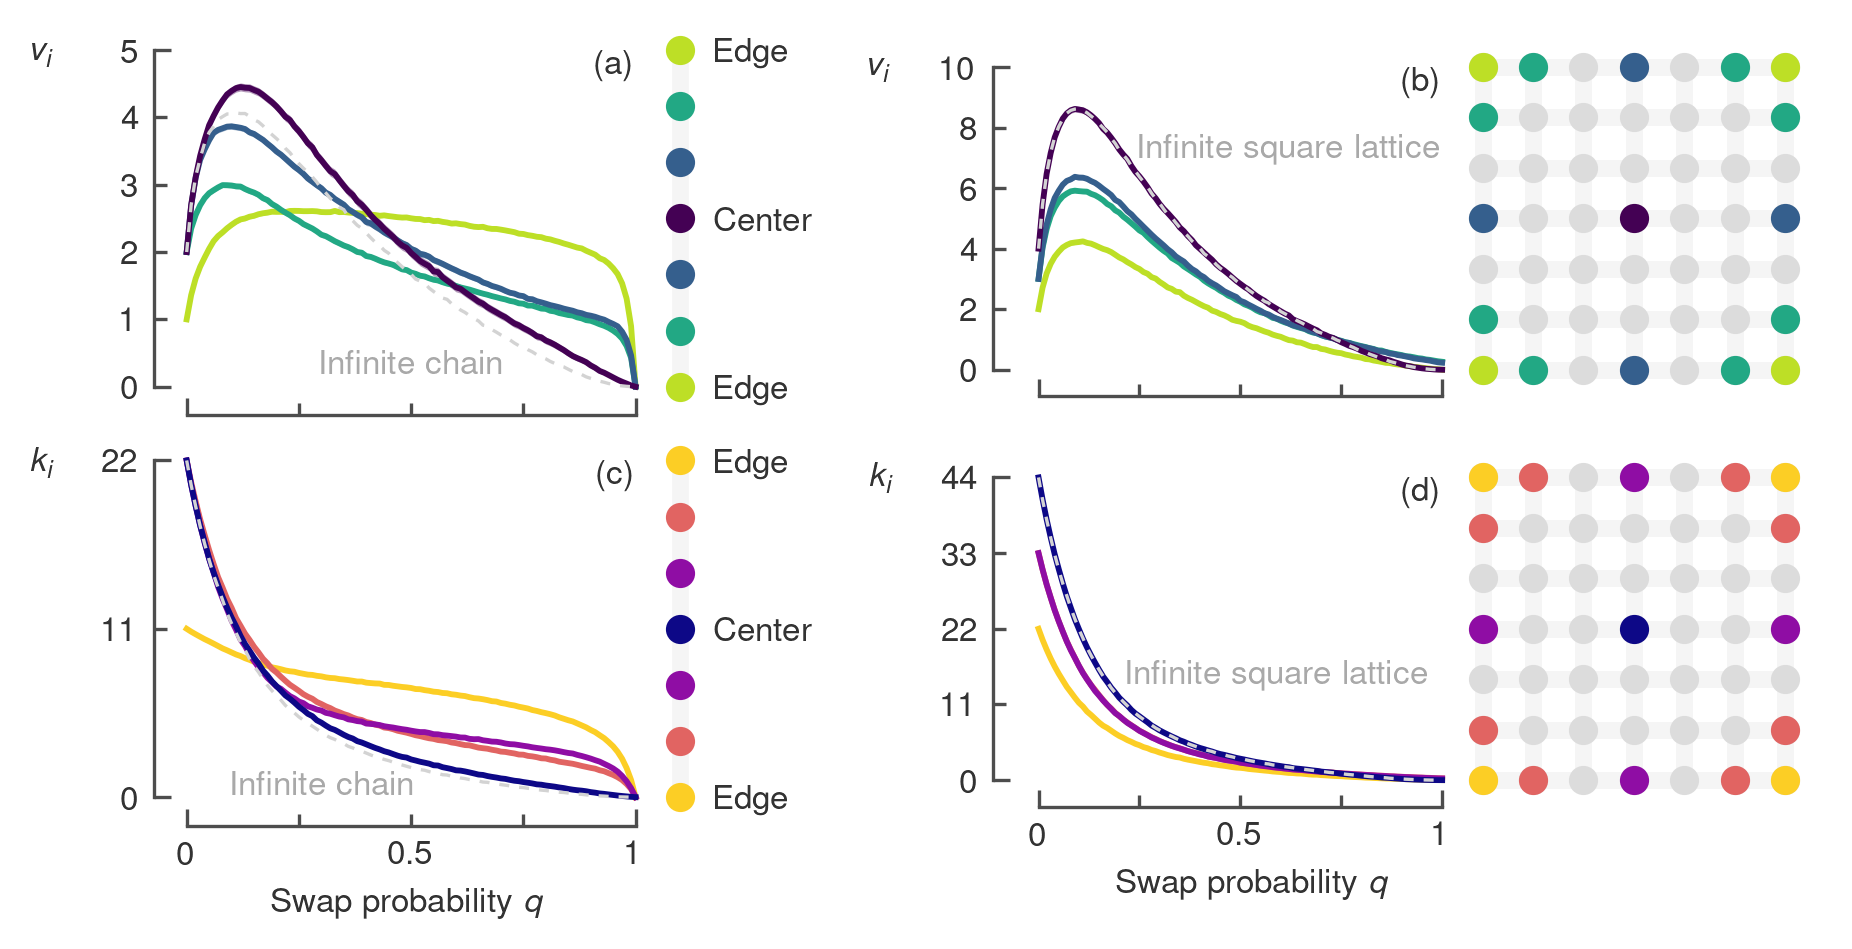

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  

col = plt.cm.viridis([0, 0.3, 0.6, 0.9])  # Plot line colors

v_max_chain = 5 
v_max_square = 10

k_max_chain = 2*time_cutoff
k_max_square = 4*time_cutoff

fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=[1.8*(86)*mm, 86*mm/4*3.6], sharex='col') 

std_factor = 6
# Plotting virtual neighborhood size
for i in range(int(np.floor(number_of_nodes/2)), number_of_nodes-0):
    ax[0, 0].plot(prob_swap_range, virt_nbhd_size_mean_fin_chain[:, i], color=col[i-int(np.floor(number_of_nodes/2))], zorder = -i)
    ax[0, 0].fill_between(prob_swap_range, virt_nbhd_size_mean_fin_chain[:, i]-std_factor*virt_nbhd_size_std_error_fin_chain[:, i],  virt_nbhd_size_mean_fin_chain[:, i]+std_factor*virt_nbhd_size_std_error_fin_chain[:, i], color=col[i-int(np.floor(number_of_nodes/2))], linewidth = 0, alpha=0.4, zorder=i-100)

ax[0, 0].plot(prob_swap_range, np.hstack(([2], virt_nbhd_size_mean_inf_chain_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 11, linewidth=0.8)

for i, j, k in [[3, 3, 0], [3, 0, 1], [1, 0, 2], [0, 0, 3]]:
    ax[0, 1].plot(prob_swap_range, virt_nbhd_size_mean_fin_sq[:, i, j], color=col[k], zorder = -k)
    ax[0, 1].fill_between(prob_swap_range, virt_nbhd_size_mean_fin_sq[:, i, j]-std_factor*virt_nbhd_size_std_error_fin_sq[:, i, j],  virt_nbhd_size_mean_fin_sq[:, i, j]+std_factor*virt_nbhd_size_std_error_fin_sq[:, i, j], color=col[k], linewidth = 0, alpha=0.4, zorder=i-5)
    
ax[0, 1].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 11, linewidth=0.8)


# Set axes
ax[0, 0].spines['left'].set_position(('outward', outward))
ax[0, 0].spines['left'].set_bounds(0, v_max_chain)
ax[0, 0].set_yticks(ticks=[0, v_max_chain])
ax[0, 0].set_yticks(ticks=[1, 2, 3, 4], minor=True)
ax[0, 0].set_yticklabels(labels=[1, 2, 3, 4], minor=True, ha='right')

ax[0, 0].spines['bottom'].set_position(('outward', outward))
ax[0, 0].spines['bottom'].set_bounds(0, 1)

ax[0, 1].spines['left'].set_position(('outward', outward))
ax[0, 1].spines['left'].set_bounds(0, v_max_square)
ax[0, 1].set_yticks(ticks=[0, v_max_square])
ax[0, 1].set_yticks(ticks=[2, 4, 6, 8], minor=True)
ax[0, 1].set_yticklabels(labels=[2, 4, 6, 8], minor=True, ha='right')

ax[0, 1].spines['bottom'].set_position(('outward', outward))
ax[0, 1].spines['bottom'].set_bounds(0, 1)

# Axes labels
ax[1, 0].set_xlabel(r'Swap probability $q$', x=0.7, color=color_text, ha='right')
ax[1, 1].set_xlabel(r'Swap probability $q$', x=0.47, color=color_text, ha='right')

ax[0, 0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 16, ha='right')
ax[0, 1].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1, 0].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1, 1].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 12, ha='right')


# Legends
delta_x = 1/6
delta_y = 1/6

for i in range(7):
    ax[0, 0].plot(1.1, i*delta_y*v_max_chain, '.', color=col[np.abs(i-3)], markersize=12)
    
ax[0, 0].plot([1.1, 1.1], [0, v_max_chain], '-', linewidth=4, color='whitesmoke',zorder=-1)    
ax[0, 0].text(1.175, 2.5, r'Center', color=color_text, fontsize=8, ha='left', va='center_baseline')
ax[0, 0].text(1.175, 5, r'Edge', color=color_text, fontsize=8, ha='left', va='center_baseline')
ax[0, 0].text(1.175, 0, r'Edge', color=color_text, fontsize=8, ha='left', va='center_baseline')



for i in range(7):
    for j in range(7):
        ax[0, 1].plot(1.1+i*delta_x/ratio, j*v_max_square*delta_y, '.', color='gainsboro', markersize=12)
        ax[0, 1].plot([1.1+i*delta_x/ratio, 1.1+i*delta_x/ratio], [0, v_max_square], '-', color='whitesmoke', linewidth=4,zorder=0)
        ax[0, 1].plot([1.1, 1.1+1/ratio], [j*v_max_square*delta_y, j*v_max_square*delta_y], '-', color='whitesmoke', linewidth=4, zorder=0)

center_node = 3
boundary_node = 0
ax[0, 1].plot(1.1+center_node*delta_x/ratio, center_node*v_max_square*delta_y, '.', color=col[0], markersize=12)
ax[0, 1].plot([1.1+center_node*delta_x/ratio, 1.1+center_node*delta_x/ratio, 1.1, 1.1+1/ratio], [boundary_node*delta_y*v_max_square, v_max_square, center_node*delta_y*v_max_square, center_node*delta_y*v_max_square], '.', color=col[1], markersize=12)
ax[0, 1].plot([1.1+delta_x/ratio, 1.1+5*delta_x/ratio, 1.1+6*delta_x/ratio, 1.1+6*delta_x/ratio, 1.1+5*delta_x/ratio, 1.1+1*delta_x/ratio, 1.1, 1.1], [0, 0, delta_y*v_max_square, 5*delta_y*v_max_square, 6*delta_y*v_max_square, 6*delta_y*v_max_square, 5*delta_y*v_max_square, 1*delta_y*v_max_square], '.', color=col[2], markersize=12)
ax[0, 1].plot([1.1, 1.1+1/ratio, 1.1+1/ratio, 1.1], [0, 0, v_max_square, v_max_square], '.', color=col[3], markersize=12)



col = plt.cm.plasma([0, 0.3, 0.6, 0.9])  # Plot line colors

# Plotting data
for i in range(int(np.floor(number_of_nodes/2)), number_of_nodes-0):
    ax[1, 0].plot(prob_swap_range, virt_node_deg_mean_fin_chain[:, i], color=col[i-int(np.floor(number_of_nodes/2))], zorder = -i)
    ax[1, 0].fill_between(prob_swap_range, virt_node_deg_mean_fin_chain[:, i]-std_factor*virt_node_deg_std_error_fin_chain[:, i],  virt_node_deg_mean_fin_chain[:, i]+std_factor*virt_node_deg_std_error_fin_chain[:, i], color=col[i-int(np.floor(number_of_nodes/2))], linewidth = 0, alpha=0.4, zorder=i-100)

ax[1, 0].plot(prob_swap_range, np.hstack(([2*time_cutoff], virt_node_deg_mean_inf_chain_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 11, linewidth=0.8)

for i, j, k in [[3, 3, 0], [3, 0, 1], [1, 0, 2], [0, 0, 3]]:
    ax[1, 1].plot(prob_swap_range, virt_node_deg_mean_fin_sq[:, i, j], color=col[k], zorder = -k)
    ax[1, 1].fill_between(prob_swap_range, virt_node_deg_mean_fin_sq[:, i, j]-std_factor*virt_node_deg_std_error_fin_sq[:, i, j],  virt_node_deg_mean_fin_sq[:, i, j]+std_factor*virt_node_deg_std_error_fin_sq[:, i, j], color=col[k], linewidth = 0, alpha=0.4, zorder=i-5)

ax[1, 1].plot(prob_swap_range, np.hstack(([4*time_cutoff], virt_node_deg_mean_inf_sq_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 11, linewidth=0.8)

# Set axes
ax[1, 0].spines['left'].set_position(('outward', outward))
ax[1, 0].spines['left'].set_bounds(0, k_max_chain)
ax[1, 0].set_yticks(ticks=[0, k_max_chain])
ax[1, 0].set_yticks(ticks=[11], minor=True)
ax[1, 0].set_yticklabels(labels=[11], minor=True, ha='right')

ax[1, 0].spines['bottom'].set_position(('outward', outward))
ax[1, 0].spines['bottom'].set_bounds(0, 1)
ax[1, 0].set_xticks(ticks=[0, 1], minor=False)
ax[1, 0].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
ax[1, 0].set_xticklabels(labels=[{}, 0.50, {}], minor=True)

ax[1, 1].spines['left'].set_position(('outward', outward))
ax[1, 1].spines['left'].set_bounds(0, k_max_square)
ax[1, 1].set_yticks(ticks=[0, k_max_square])
ax[1, 1].set_yticks(ticks=[11, 22, 33], minor=True)
ax[1, 1].set_yticklabels(labels=[11, 22, 33], minor=True, ha='right')

ax[1, 1].spines['bottom'].set_position(('outward', outward))
ax[1, 1].spines['bottom'].set_bounds(0, 1)
ax[1, 1].set_xticks(ticks=[0, 1], minor=False)
ax[1, 1].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
ax[1, 1].set_xticklabels(labels=[{}, 0.50, {}], minor=True)

# Legends
delta_x = 1/6
delta_y = 1/6

for i in range(7):
    ax[1, 0].plot(1.1, i*delta_y*k_max_chain, '.', color=col[np.abs(i-3)], markersize=12)
    
ax[1, 0].plot([1.1, 1.1], [0, k_max_chain], '-', linewidth=4, color='whitesmoke',zorder=-1)    
ax[1, 0].text(1.175, k_max_chain/2, r'Center', color=color_text, fontsize=8, ha='left', va='center_baseline')
ax[1, 0].text(1.175, k_max_chain, r'Edge', color=color_text, fontsize=8, ha='left', va='center_baseline')
ax[1, 0].text(1.175, 0, r'Edge', color=color_text, fontsize=8, ha='left', va='center_baseline')



for i in range(7):
    for j in range(7):
        ax[1, 1].plot(1.1+i*delta_x/ratio, j*k_max_square*delta_y, '.', color='gainsboro', markersize=12)
        ax[1, 1].plot([1.1+i*delta_x/ratio, 1.1+i*delta_x/ratio], [0, k_max_square], '-', color='whitesmoke', linewidth=4,zorder=0)
        ax[1, 1].plot([1.1, 1.1+1/ratio], [j*k_max_square*delta_y, j*k_max_square*delta_y], '-', color='whitesmoke', linewidth=4, zorder=0)

center_node = 3
boundary_node = 0
ax[1, 1].plot(1.1+center_node*delta_x/ratio, center_node*k_max_square*delta_y, '.', color=col[0], markersize=12)
ax[1, 1].plot([1.1+center_node*delta_x/ratio, 1.1+center_node*delta_x/ratio, 1.1, 1.1+1/ratio], [boundary_node*delta_y*k_max_square, k_max_square, center_node*delta_y*k_max_square, center_node*delta_y*k_max_square], '.', color=col[1], markersize=12)
ax[1, 1].plot([1.1+delta_x/ratio, 1.1+5*delta_x/ratio, 1.1+6*delta_x/ratio, 1.1+6*delta_x/ratio, 1.1+5*delta_x/ratio, 1.1+1*delta_x/ratio, 1.1, 1.1], [0, 0, delta_y*k_max_square, 5*delta_y*k_max_square, 6*delta_y*k_max_square, 6*delta_y*k_max_square, 5*delta_y*k_max_square, 1*delta_y*k_max_square], '.', color=col[2], markersize=12)
ax[1, 1].plot([1.1, 1.1+1/ratio, 1.1+1/ratio, 1.1], [0, 0, k_max_square, k_max_square], '.', color=col[3], markersize=12)



# Plot remarks
ax[0, 0].text(0.3, 0.2, r'Infinite chain', color='darkgray', fontsize=8)
ax[0, 1].text(0.25, 7, r'Infinite square lattice', color='darkgray', fontsize = 8)
ax[1, 0].text(0.1, 0.2, r'Infinite chain', color='darkgray', fontsize=8)
ax[1, 1].text(0.22, 14, r'Infinite square lattice', color='darkgray', fontsize = 8)

# Setting plot limits and aspect ratio
ax[0, 0].set_ylim([0-0.06*v_max_chain, v_max_chain+0.06*v_max_chain])
ax[0, 0].set_aspect(1/(v_max_chain*ratio))

ax[0, 1].set_ylim([0-0.06*v_max_square, v_max_square+0.06*v_max_square])
ax[0, 1].set_aspect(1/(v_max_square*ratio))

ax[1, 0].set_ylim([0-0.06*k_max_chain, k_max_chain+0.06*k_max_chain])
ax[1, 0].set_aspect(1/(k_max_chain*ratio))

ax[1, 1].set_ylim([0-0.06*k_max_square, k_max_square+0.06*k_max_square])
ax[1, 1].set_aspect(1/(k_max_square*ratio))

ax[0, 0].text(1, v_max_chain, r'(a)', color=color_text, ha='right', va='top')
ax[0, 1].text(1, v_max_square, r'(b)', color=color_text, ha='right', va='top')
ax[1, 0].text(1, k_max_chain, r'(c)', color=color_text, ha='right', va='top')
ax[1, 1].text(1, k_max_square, r'(d)', color=color_text, ha='right', va='top')

# fig.savefig('figures/fin_networks_inc_ki.pdf', bbox_inches = 'tight', pad_inches=0*mm)

## 2. The same performance metrics for equivalent nodes

In a finite chain, the performance metrics of nodes with the same number of physical links to the center node (nodes symmetric around the center) behaves equivalently. Below we present the absolute difference between the performance two nodes with the same number of physical links to the center (normalized to the maximum value) for $q\in\{0, 0.01, \dots 0.99 \}$ (note that, for $q=1$, $v_i, k_i =0$). Generally, this difference is well below 1%, increasing slightly as $q\to1$ (then the performance metrics become really small). 

Text(0.65, 0, 'Swap probability $q$')

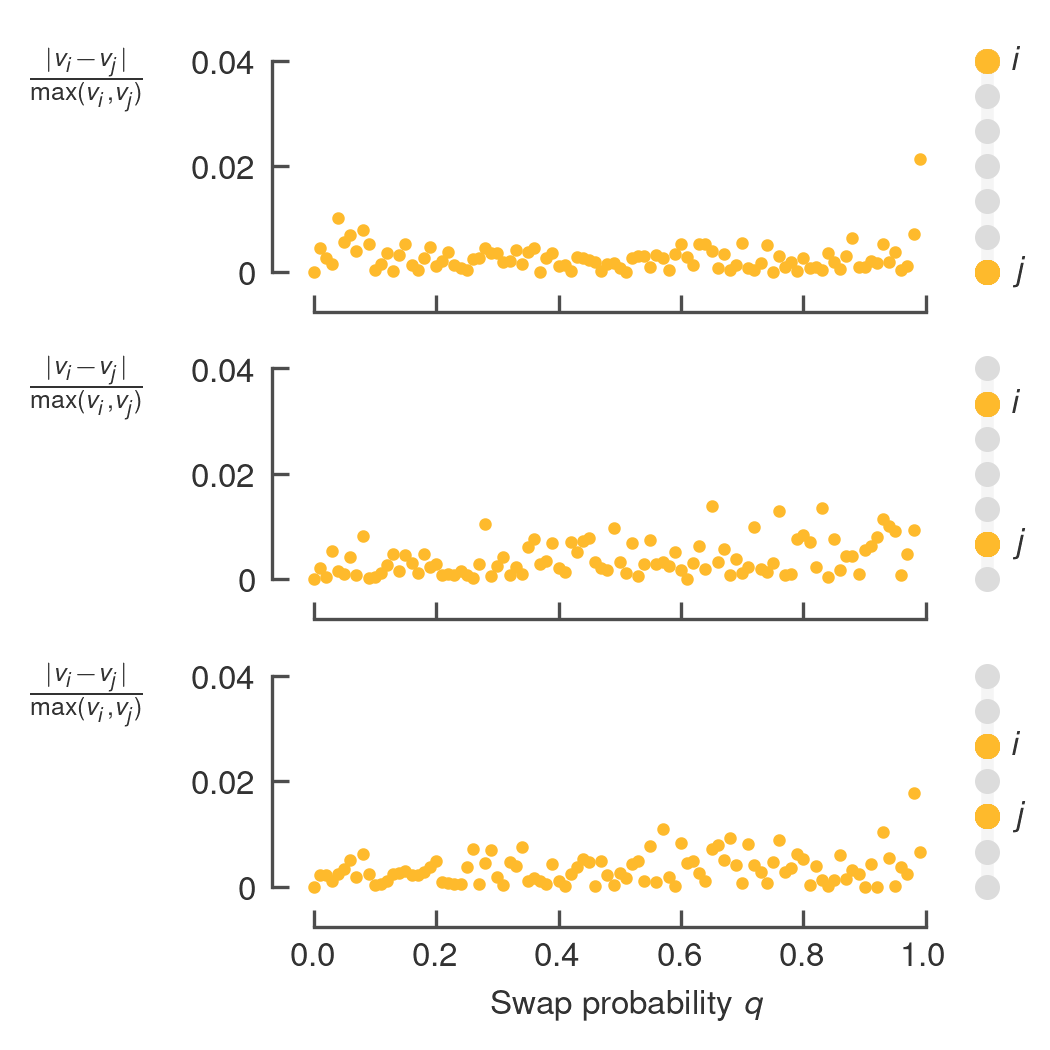

In [9]:
import matplotlib.pyplot as plt
plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  

col = plt.cm.plasma([0.85])  # Plot line colors

y_max = 0.04

fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=[(86)*mm, 86*mm], sharex='col') 

for n in range(int(np.floor(number_of_nodes/2))):
    v_diff = (virt_nbhd_size_mean_fin_chain[:-1, 6-n]-virt_nbhd_size_mean_fin_chain[:-1, n])
    v_max = np.maximum(virt_nbhd_size_mean_fin_chain[:-1, 6-n], virt_nbhd_size_mean_fin_chain[:-1, n])
    ax[n].plot(prob_swap_range[:-1], np.abs(v_diff/v_max), '.', color=col, markersize=4)

    # Legends
    delta_x = 1/6
    delta_y = 1/6
    
    ax[n].text(1.14, n*delta_y*y_max, r'$j$', ha='left', va='center', fontsize=8, color=color_text)
    ax[n].text(1.14, (6-n)*delta_y*y_max, r'$i$', ha='left', va='center', fontsize=8, color=color_text)
    
    for i in range(7):
        ax[n].plot(1.1, i*delta_y*y_max, '.', color='gainsboro', markersize=10)
        ax[n].plot([1.1, 1.1], [n*delta_y*y_max, (6-n)*delta_y*y_max], '.', color=col, markersize=10)
        
    ax[n].plot([1.1, 1.1], [0, y_max], '-', linewidth=3, color='whitesmoke',zorder=-1)

    
    # Set axes
    ax[n].spines['left'].set_position(('outward', outward))
    ax[n].spines['left'].set_bounds(0, y_max)
    ax[n].set_yticks(ticks=[0, y_max/2, y_max])
    ax[n].set_yticklabels(labels=[0, y_max/2, y_max], ha='right')

    ax[n].spines['bottom'].set_position(('outward', outward))
    ax[n].spines['bottom'].set_bounds(0, 1)
    
    # Axes labels
    ax[n].set_ylabel(r'$\frac{|v_i-v_j|}{\max(v_i, v_j)}$', rotation=0, y=0.7, labelpad = 12, ha='right')
    
    ax[n].set_ylim([-0.15*y_max, 1.15*y_max])

    
ax[2].set_xlabel(r'Swap probability $q$', x=0.65, color=color_text, ha='right')

Text(0.65, 0, 'Swap probability $q$')

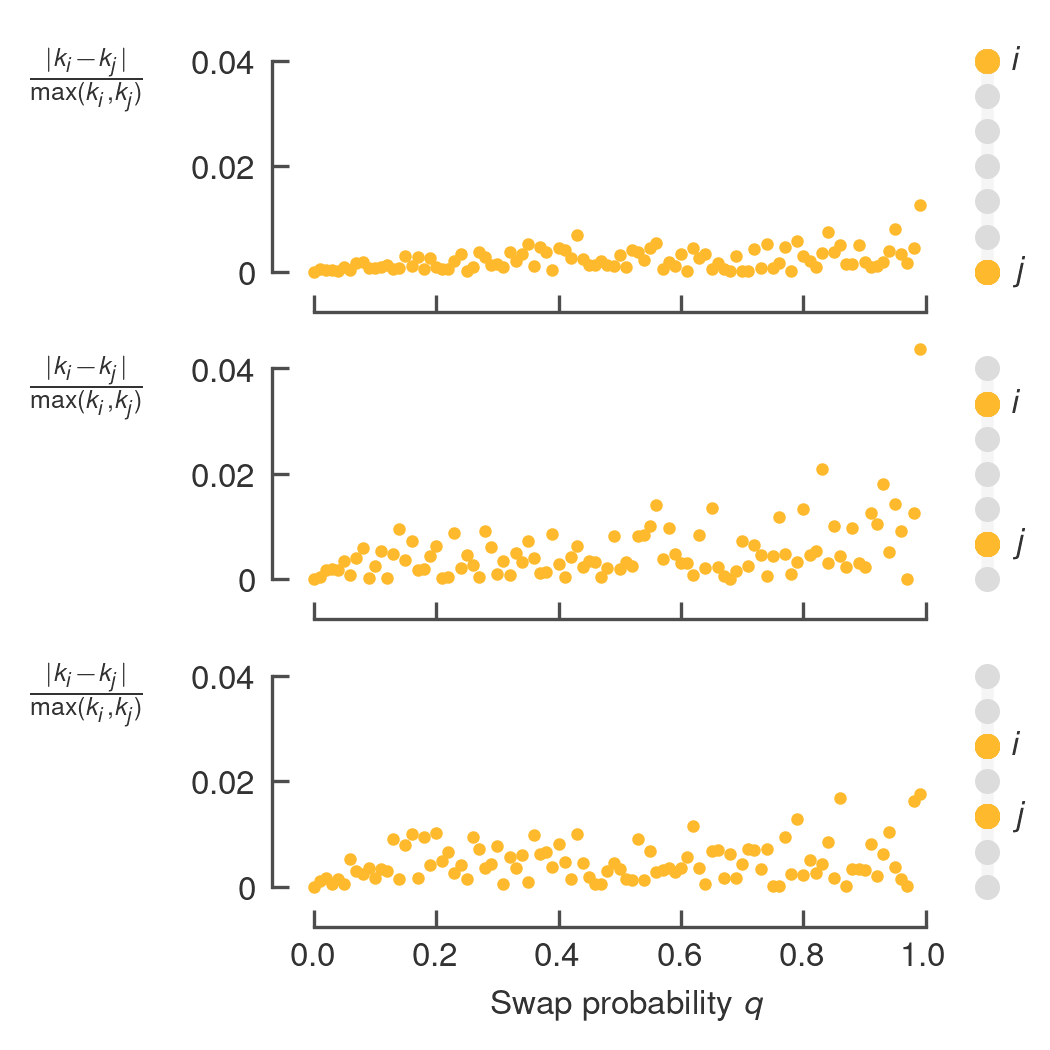

In [11]:
import matplotlib.pyplot as plt
plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  

col = plt.cm.plasma([0.85])  # Plot line colors

y_max = 0.04

fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=[(86)*mm, 86*mm], sharex='col') 

for n in range(int(np.floor(number_of_nodes/2))):
    k_diff = (virt_node_deg_mean_fin_chain[:-1, 6-n]-virt_node_deg_mean_fin_chain[:-1, n])
    k_max = np.maximum(virt_node_deg_mean_fin_chain[:-1, n], virt_node_deg_mean_fin_chain[:-1, 6-n])
    ax[n].plot(prob_swap_range[:-1], np.abs(k_diff/k_max), '.', color=col, markersize=4)

    # Legends
    delta_x = 1/6
    delta_y = 1/6
    
    ax[n].text(1.14, n*delta_y*y_max, r'$j$', ha='left', va='center', fontsize=8, color=color_text)
    ax[n].text(1.14, (6-n)*delta_y*y_max, r'$i$', ha='left', va='center', fontsize=8, color=color_text)
    
    for i in range(7):
        ax[n].plot(1.1, i*delta_y*y_max, '.', color='gainsboro', markersize=10)
        ax[n].plot([1.1, 1.1], [n*delta_y*y_max, (6-n)*delta_y*y_max], '.', color=col, markersize=10)
        
    ax[n].plot([1.1, 1.1], [0, y_max], '-', linewidth=3, color='whitesmoke',zorder=-1)

    
    # Set axes
    ax[n].spines['left'].set_position(('outward', outward))
    ax[n].spines['left'].set_bounds(0, y_max)
    ax[n].set_yticks(ticks=[0, y_max/2, y_max])
    ax[n].set_yticklabels(labels=[0, y_max/2, y_max], ha='right')

    ax[n].spines['bottom'].set_position(('outward', outward))
    ax[n].spines['bottom'].set_bounds(0, 1)
    
    # Axes labels
    ax[n].set_ylabel(r'$\frac{|k_i-k_j|}{\max(k_i, k_j)}$', rotation=0, y=0.7, labelpad = 12, ha='right')
    
    ax[n].set_ylim([-0.15*y_max, 1.15*y_max])

    
ax[2].set_xlabel(r'Swap probability $q$', x=0.65, color=color_text, ha='right')